In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import keras
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'keras'

In [2]:
#Train Dataset

In [3]:
s_train = pd.read_csv('SalaryData_Train.csv')
s_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [4]:
#EDA
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
s_train.shape

(30161, 14)

In [6]:
s_train.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [7]:
s_train = s_train.drop_duplicates()
s_train

age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
30154   53            Private        Masters           14   
30155   22            Private   Some-college           10   
30156   27            Private     Assoc-acdm           12   
30158   58            Private        HS-grad            9   
30160   52       Self-emp-inc        HS-grad            9   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
30154   Married-civ-spouse     Exec-managerial         Husband   White   
30155        Never-married     Protective-serv   Not-in-family   White   
30156   Married-civ-spouse        Tech-support            Wife   White   
30158              Widowed        Adm-clerical       Unmarried   White   
30160   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capitalgain  capitalloss  hoursperweek          native  Salary  
0         Male         2174            0            40   United-States   <=50K  
1         Male            0            0            13   United-States   <=50K  
2         Male            0            0            40   United-States   <=50K  
3         Male            0            0            40   United-States   <=50K  
4       Female            0            0            40            Cuba   <=50K  
...        ...          ...          ...           ...             ...     ...  
30154     Male            0            0            40   United-States    >50K  
30155     Male            0            0            40   United-States   <=50K  
30156   Female            0            0            38   United-States   <=50K  
30158   Female            0            0            40   United-States   <=50K  
30160   Female        15024            0            40   United-States    >50K  

[26903 rows x 14 columns]

In [8]:
s_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
s_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
s_train['workclass']= label_encoder.fit_transform(s_train['workclass']) 
s_train['education']= label_encoder.fit_transform(s_train['education'])
s_train['maritalstatus']= label_encoder.fit_transform(s_train['maritalstatus'])
s_train['occupation']= label_encoder.fit_transform(s_train['occupation'])
s_train['relationship']= label_encoder.fit_transform(s_train['relationship'])
s_train['race']= label_encoder.fit_transform(s_train['race'])
s_train['sex']= label_encoder.fit_transform(s_train['sex'])
s_train['native']= label_encoder.fit_transform(s_train['native'])
s_train['Salary']= label_encoder.fit_transform(s_train['Salary'])
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.pairplot(s_train,hue="Salary")

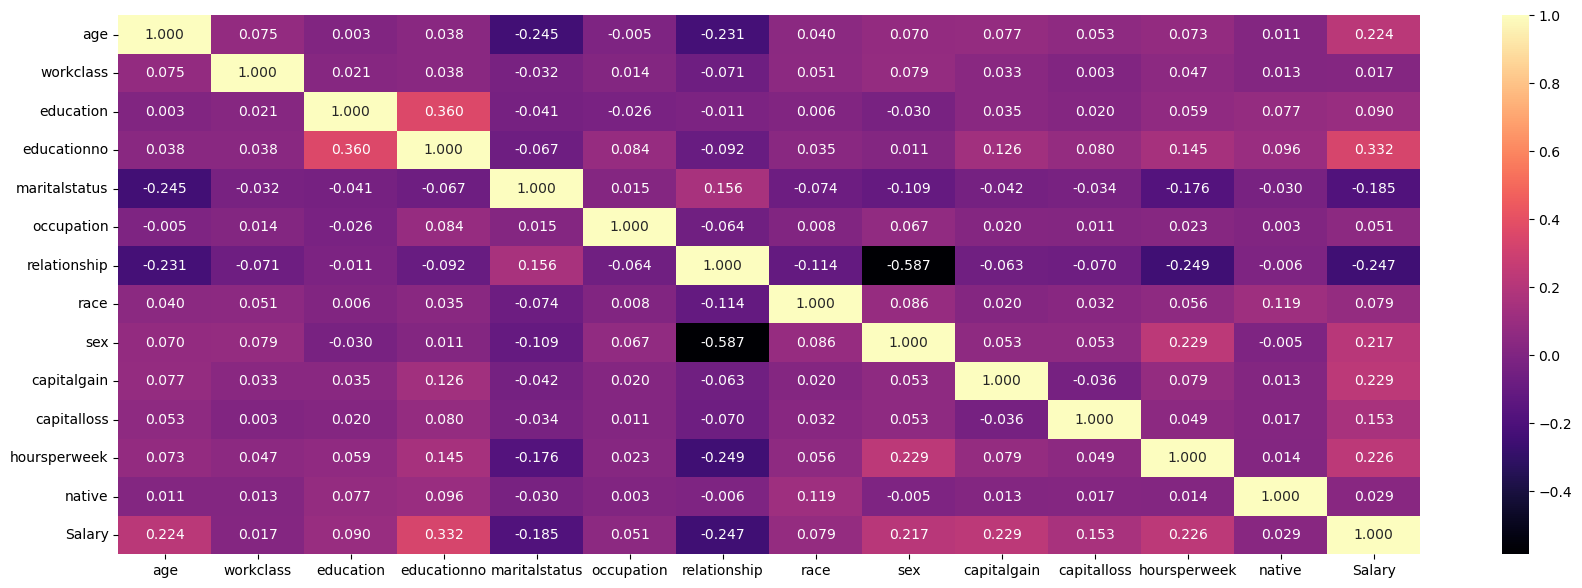

In [12]:
plt.figure(figsize = (21, 7));
sns.heatmap(s_train.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

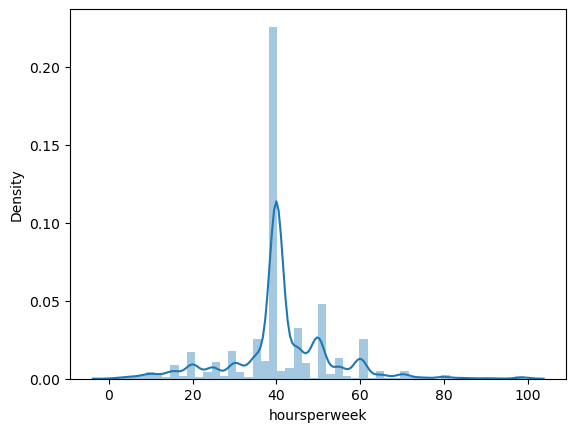

In [13]:
sns.distplot(s_train['hoursperweek'])

<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

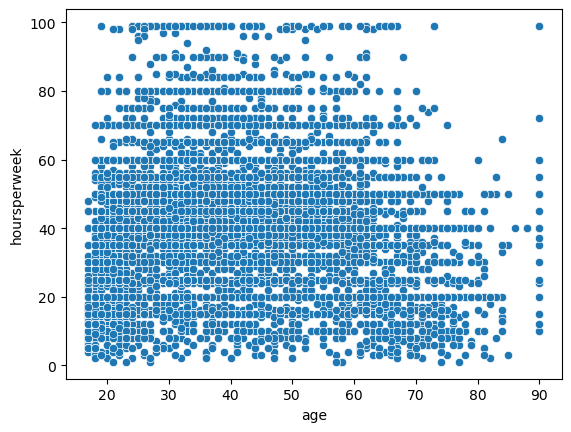

In [14]:
sns.scatterplot(x='age',y='hoursperweek',data=s_train)

In [15]:
s_train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30154   53          2         12           14              2           3   
30155   22          2         15           10              4          10   
30156   27          2          7           12              2          12   
30158   58          2         11            9              6           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30154             0     4    1            0            0            40   
30155             1     4    1            0            0            40   
30156             5     4    0            0            0            38   
30158             4     4    0            0            0            40   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30154      37       1  
30155      37       0  
30156      37       0  
30158      37       0  
30160      37       1  

[26903 rows x 14 columns]

In [ ]:
#Test DataSet

In [20]:
s_test=pd.read_csv("SalaryData_Test.csv")
s_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [21]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [22]:
s_test.shape

(15060, 14)

In [23]:
s_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
s_test.duplicated().value_counts()

False    14130
True       930
dtype: int64

In [25]:
s_test=s_test.drop_duplicates()
s_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[14130 rows x 14 columns]

In [26]:
s_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
s_test['workclass']= label_encoder.fit_transform(s_test['workclass']) 
s_test['education']= label_encoder.fit_transform(s_test['education'])
s_test['maritalstatus']= label_encoder.fit_transform(s_test['maritalstatus'])
s_test['occupation']= label_encoder.fit_transform(s_test['occupation'])
s_test['relationship']= label_encoder.fit_transform(s_test['relationship'])
s_test['race']= label_encoder.fit_transform(s_test['race'])
s_test['sex']= label_encoder.fit_transform(s_test['sex'])
s_test['native']= label_encoder.fit_transform(s_test['native'])
s_test['Salary']= label_encoder.fit_transform(s_test['Salary'])

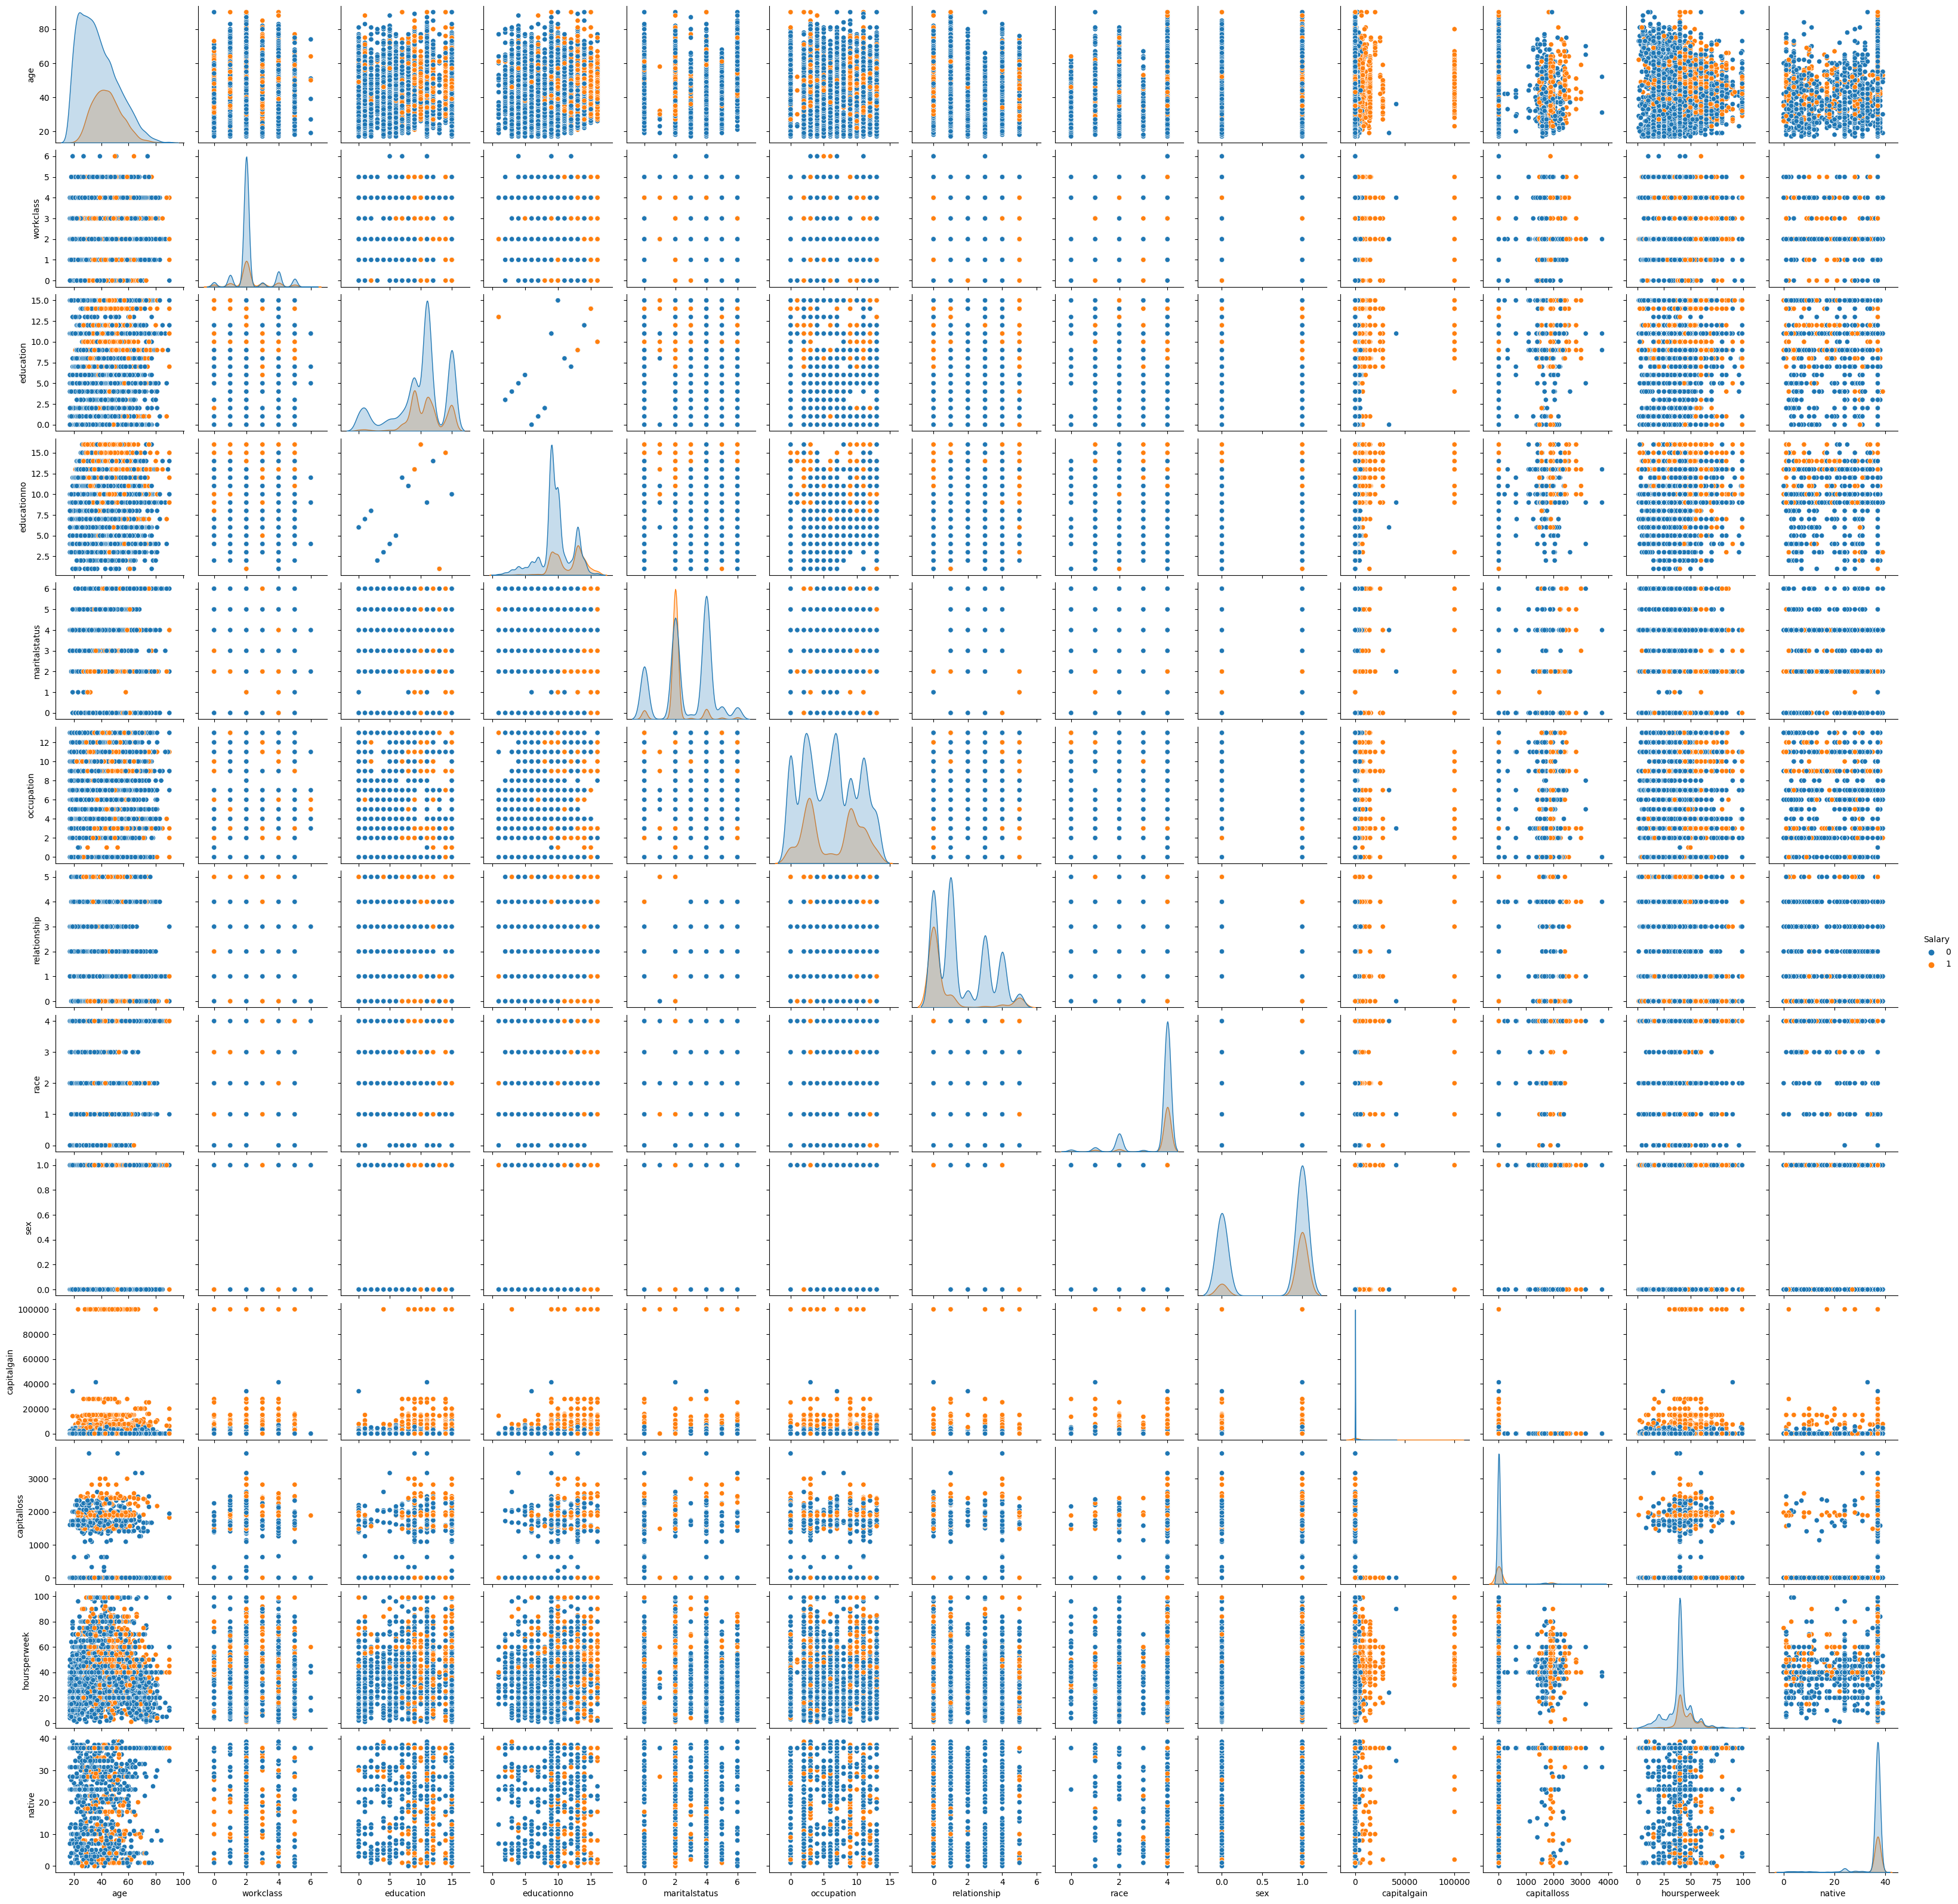

In [29]:
sns.pairplot(s_test,hue="Salary")

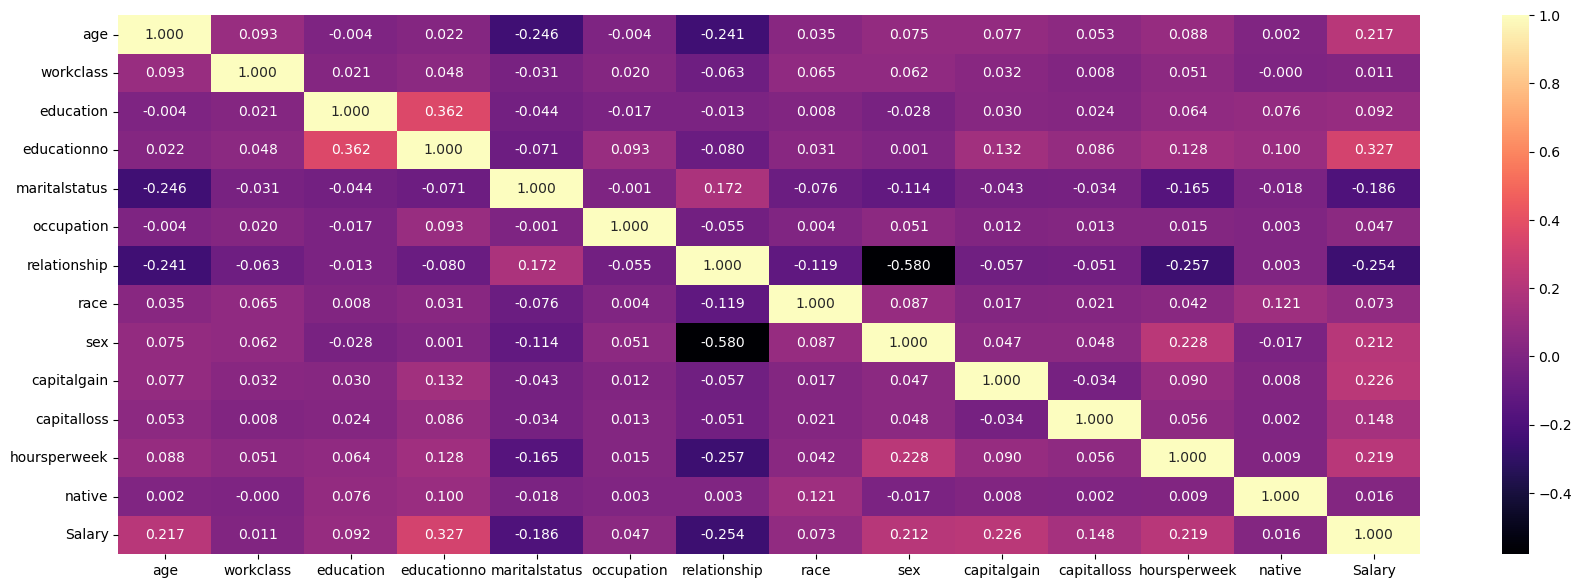

In [30]:
plt.figure(figsize = (21, 7));
sns.heatmap(s_test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [31]:
s_train.columns==s_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [32]:
#Train Test Split on Salary DataSet

In [33]:
xtrain = s_train.iloc[:,0:13]
ytrain = s_train.iloc[:,-1] 

In [34]:
xtest = s_test.iloc[:,0:13]
ytest = s_test.iloc[:,-1]

In [35]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((26903, 13), (26903,), (14130, 13), (14130,))

In [37]:
#1] MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB      # Multinomial Naive Bayes
from sklearn.metrics import classification_report

In [39]:
nb = MultinomialNB()

nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(nb.score(xtrain,ytrain))
print(nb.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.7683158012117608
0.7733899504600141
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     10620
           1       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130



In [40]:
#2] CategoricalNB

In [41]:
from sklearn.naive_bayes import CategoricalNB as CNB

In [42]:
CNB = CNB()
CNB.fit(xtrain,ytrain)
ypred = CNB.predict(xtest)

print(CNB.score(xtrain,ytrain))
print(CNB.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.8539196372151805
0.853927813163482
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     10620
           1       0.73      0.66      0.69      3510

    accuracy                           0.85     14130
   macro avg       0.81      0.79      0.80     14130
weighted avg       0.85      0.85      0.85     14130



In [43]:
#3] GaussianNB

In [44]:
from sklearn.naive_bayes import GaussianNB as GB

In [45]:
GB = GB()
GB.fit(xtrain,ytrain)
ypred = GB.predict(xtest)

print(GB.score(xtrain,ytrain))
print(GB.score(xtest,ytest))
print(classification_report(ytest,ypred))

0.7933687692822362
0.7951875442321302
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10620
           1       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg       0.78      0.80      0.77     14130



In [46]:
# Inference: Categorical Naive Bayes gives us better Accuracy compares to others